<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/FIG/M5_MUE_visual_active_inactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [2]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [3]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *
from scripts.TRAIN import *
print('VOCAB TYPE:', VOCAB_TYPE)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
VOCAB TYPE: smiles


## Result of MUE on M5

In [9]:
from scripts.MUE import *

ind_list = []
for name in names_M5:
    perfs = []
    for i in range(3):
        p = yml_report(f'M5/uw/MUE_{name}_{i}.yml')
        perfs.append(p)
    best_idx = eval_perf_list(perfs, name, {})
    ind_list.append(best_idx)


repeated num # 3 idx 0 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.850$\pm$0.000  &0.850$\pm$0.000  &0.826$\pm$0.001  &0.853$\pm$0.002  &0.848$\pm$0.001  &0.840$\pm$0.001  &0.925$\pm$0.000  &0.700$\pm$0.001  &0.910$\pm$0.000  
 idx 0: &0.850            &0.850            &0.828            &0.850            &0.850            &0.839            &0.925            &0.699            &0.909            

repeated num # 3 idx 0 has the lowest loss
******************** CYP2D6_Veith ******************** 
	|       acc      |       w_acc      |       prec      |       recall      |       sp      |       f1      |       auc      |       mcc      |       ap      
	&0.891$\pm$0.001  &0.780$\pm$0.002  &0.761$\pm$0.001  &0.603$\pm$0.005  &0.957$\pm$0.001  &0.673$\pm$0.003  &0.900$\pm$0.004  &0.614$\pm$0.003  &0.7

In [ ]:
names = names_M5
folder_name = 'M5/uw'
model_dict={'MLP': 1,
            'AttentiveFP':1,
            'GIN':1,
            'RNN':1
            }
trn, val, tst = collect_data(names)

trn_list = process_ensemble_v1(trn, folder_name, model_dict)
val_list = process_ensemble_v1(val, folder_name, model_dict)
tst_list = process_ensemble_v1(tst, folder_name, model_dict)

Model type:  MUE | Model parameters:  2945
finish load data status 

load pretrained model from  M5/uw/MUE_CYP2C19_Veith_0.pt
[Test] Loss: 0.098
*************** CYP2C19_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.852  &0.853  &0.828  &0.856  &0.850  &0.842 &0.925 &0.704 &0.909


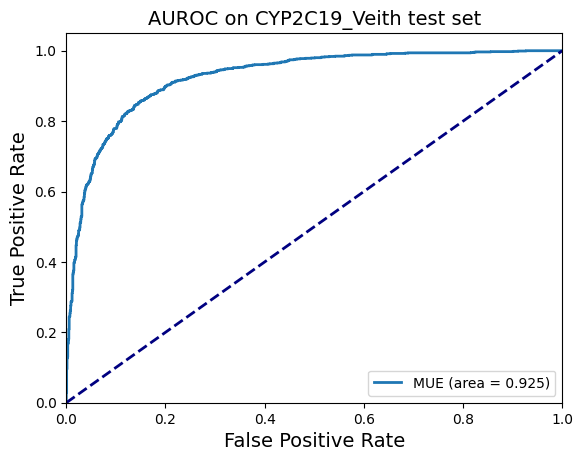

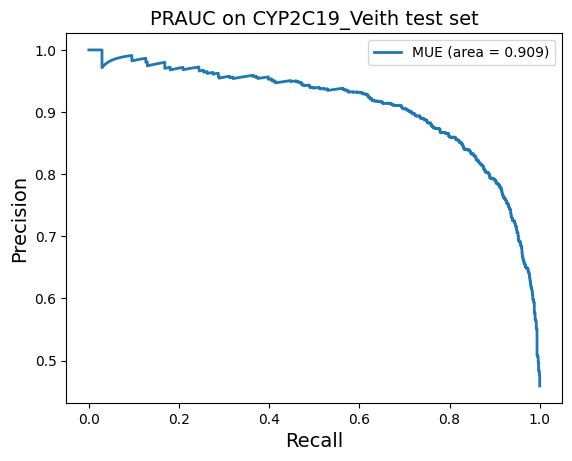


Model type:  MUE | Model parameters:  2945
finish load data status 

load pretrained model from  M5/uw/MUE_CYP2D6_Veith_0.pt
[Test] Loss: 0.146
*************** CYP2D6_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.890  &0.778  &0.760  &0.598  &0.957  &0.670 &0.901 &0.611 &0.756


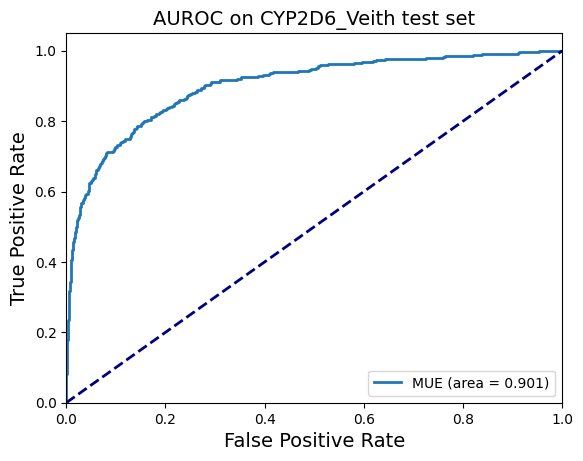

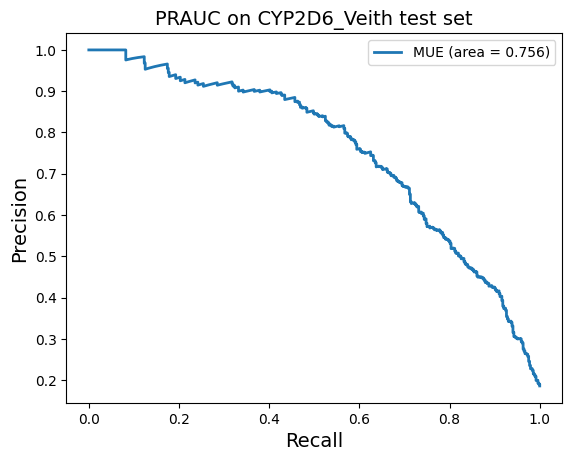


Model type:  MUE | Model parameters:  2945
finish load data status 

load pretrained model from  M5/uw/MUE_CYP3A4_Veith_0.pt
[Test] Loss: 0.232
*************** CYP3A4_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.841  &0.837  &0.804  &0.812  &0.861  &0.808 &0.922 &0.673 &0.890


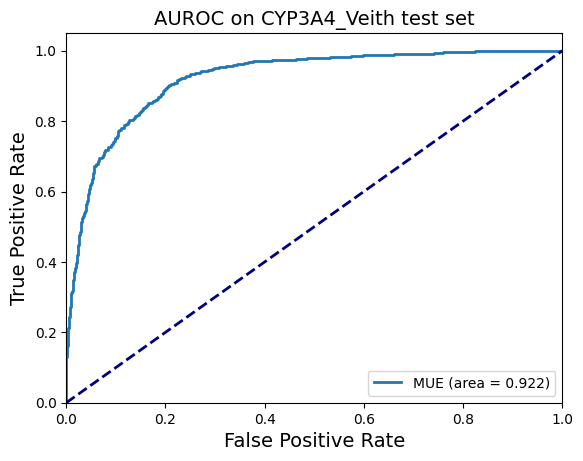

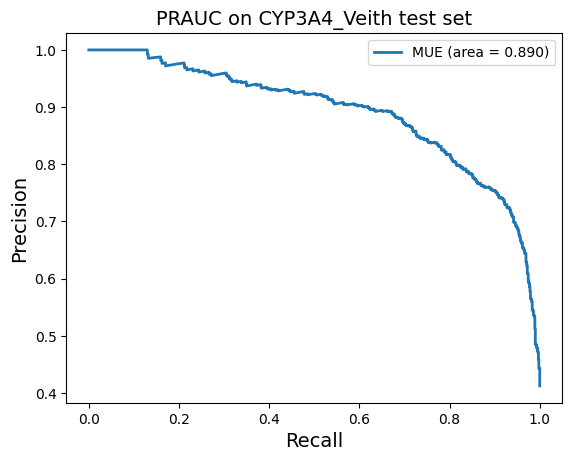


Model type:  MUE | Model parameters:  2945
finish load data status 

load pretrained model from  M5/uw/MUE_CYP1A2_Veith_2.pt
[Test] Loss: 0.249
*************** CYP1A2_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.886  &0.886  &0.876  &0.884  &0.888  &0.880 &0.954 &0.771 &0.953


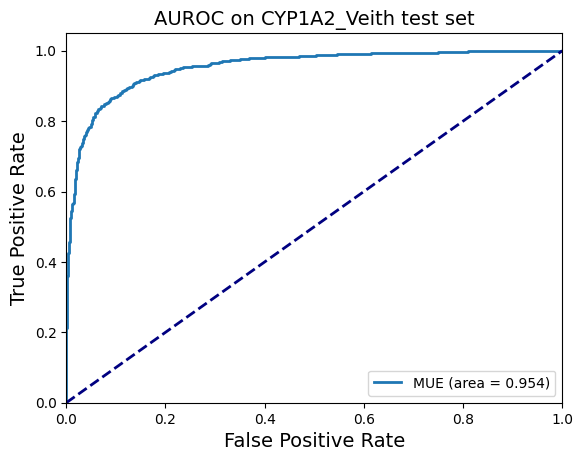

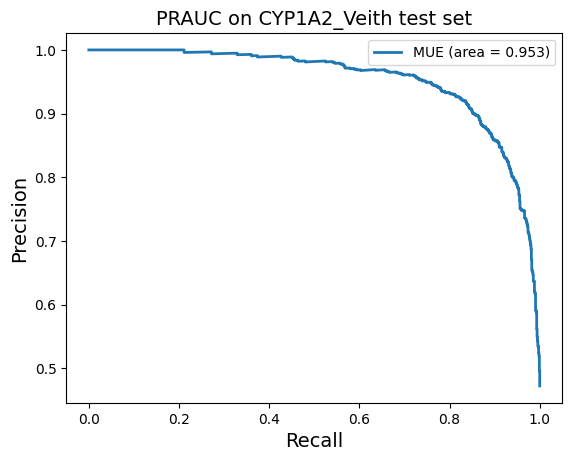


Model type:  MUE | Model parameters:  2945
finish load data status 

load pretrained model from  M5/uw/MUE_CYP2C9_Veith_2.pt
[Test] Loss: 0.340
*************** CYP2C9_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.851  &0.830  &0.789  &0.764  &0.896  &0.777 &0.928 &0.665 &0.848


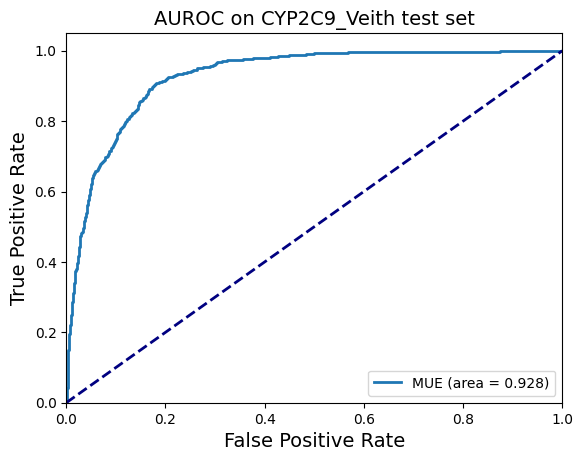

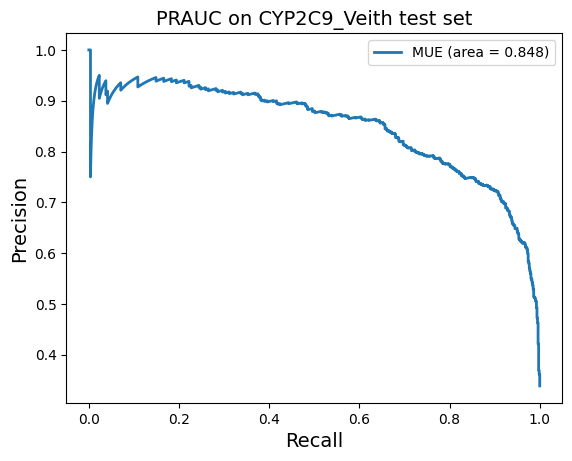

In [14]:
prob_dict = {}
for task_num in range(len(names)):
    task_name = names[task_num]
    ind = ind_list[task_num]
    config_path = folder_name + '/MUE_' + task_name  + '_' +  str(ind) + '.yml'

    with open(config_path, 'r') as f: data = yaml.safe_load(f)
    config = data['config']
    batch_size = config['batch_size']
    params_ = {'batch_size': batch_size, 'shuffle': True,
                    'drop_last': False, 'num_workers': 0}

    param_t = {'batch_size': batch_size, 'shuffle': False,
                    'drop_last': False, 'num_workers': 0}


    trn_l = DataLoader(ensemble_dataset(trn_list[task_num], task_name), **params_)
    val_l = DataLoader(ensemble_dataset(val_list[task_num], task_name), **params_)
    tst_l = DataLoader(ensemble_dataset(tst_list[task_num], task_name), **param_t)

    models = PRED(**config)
    models.load_status(data)
    p = models.eval(tst_l)
    prob_dict[task_name] = p

In [31]:
import plotly.express as px
all_df = pd.DataFrame()

prob_list = []
task_list = []
label_list = []
for ind in range(len(names_M5)):
    name = names_M5[ind]
    p = prob_dict[name]
    probs = p[1][name]
    label = p[2][name]
    assert len(probs) == len(label)

    task_len = len(label)

    temp_labels = []
    for l in label:
        if l == 1:   temp_labels.append('Active')
        elif l == 0: temp_labels.append('Inactive')
        else: print('Label not exist')



    short_name = name.split('_')[0]
    task_list += [short_name] * task_len
    label_list += temp_labels
    prob_list += probs


In [32]:
all_df['label'] = pd.DataFrame(label_list)
all_df['task'] = pd.DataFrame(task_list)
all_df['prob'] = pd.DataFrame(prob_list)
all_df

,label,task,prob
0,Inactive,CYP2C19,0.058115
1,Active,CYP2C19,0.920245
2,Active,CYP2C19,0.914776
3,Inactive,CYP2C19,0.050822
4,Inactive,CYP2C19,0.044819
...,...,...,...
12554,Inactive,CYP2C9,0.050971
12555,Active,CYP2C9,0.941754
12556,Inactive,CYP2C9,0.335900
12557,Inactive,CYP2C9,0.258326


<Axes: xlabel='task', ylabel='prob'>

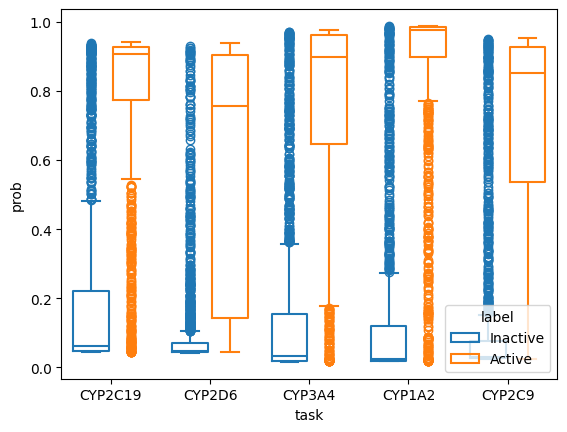

In [42]:
import seaborn as sns
sns.boxplot(data=all_df, x="task", y="prob", hue="label", fill=False, gap=.1)


In [44]:
fig = px.box(all_df, x="task", y="prob", color="label", points=False, title='MUE performance on Metabolism tasks')
fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.show()